In [1]:
import pandas as pd
from sklearn import model_selection
from sklearn import preprocessing

In [2]:
# fix the duplicate feature...
%run ./dataFix.ipynb

./dataFix.ipynb:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  "source": [
./dataFix.ipynb:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  {
./dataFix.ipynb:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  {


In [3]:
motionData

id snapshot_image thumbnail_image  bodyAngleX  bodyAngleZ  \
0       5          shot5           shot5        -0.0    0.000000   
1       6          shot6           shot6        -0.0    0.143624   
2       8          shot8           shot8        -0.0   -0.114640   
3      10         shot10          shot10        -0.0   -0.253606   
4      12         shot12          shot12        -0.0    0.000000   
5      13         shot13          shot13        -0.0    0.000000   
6      15         shot15          shot15        -0.0    0.000000   
7      17         shot17          shot17        -0.0    0.079915   
8      20         shot20          shot20        -0.0    0.071427   
9      26         shot26          shot26        -0.0    0.000000   
10     29         shot29          shot29        -0.0   -0.141520   
11     38         shot38          shot38        -0.0    0.000000   
12     40         shot40          shot40        -0.0    0.000000   
13     45         shot45          shot45        -0.0    0.238293   
14     47         shot47          shot47        -0.0   -0.064454   
15     49         shot49          shot49        -0.0   -0.003291   
16     50         shot50          shot50        -0.0    0.071389   
17     51         shot51          shot51        -0.0    0.000000   
18     52         shot52          shot52        -0.0    0.030099   
19     57         shot57          shot57        -0.0    0.000000   
20     65         shot65          shot65        -0.0    0.000000   
21     66         shot66          shot66        -0.0    0.105072   
22     68         shot68          shot68        -0.0    0.199350   
23     70         shot70          shot70        -0.0    0.000000   
24     72         shot72          shot72        -0.0    0.204766   
25     74         shot74          shot74        -0.0   -0.184391   
26     78         shot78          shot78        -0.0   -0.270486   
27     79         shot79          shot79        -0.0    0.000000   
28     80         shot80          shot80        -0.0    0.000000   
29     84         shot84          shot84        -0.0    0.000000   
..    ...            ...             ...         ...         ...   
640  2741       shot2741        shot2741        -0.0    0.000000   
641  2743       shot2743        shot2743        -0.0    0.000000   
642  2747       shot2747        shot2747        -0.0   -0.088982   
643  2749       shot2749        shot2749        -0.0    0.000000   
644  2752       shot2752        shot2752        -0.0   -0.065583   
645  2754       shot2754        shot2754        -0.0    0.000000   
646  2760       shot2760        shot2760        -0.0    0.298860   
648  2763       shot2763        shot2763        -0.0   -0.266728   
649  2772       shot2772        shot2772        -0.0    0.256045   
650  2775       shot2775        shot2775        -0.0    0.207716   
651  2780       shot2780        shot2780        -0.0   -0.225731   
652  2781       shot2781        shot2781        -0.0   -0.181192   
653  2784       shot2784        shot2784        -0.0    0.000000   
654  2789       shot2789        shot2789        -0.0    0.000000   
655  2790       shot2790        shot2790        -0.0   -0.198520   
656  2791       shot2791        shot2791        -0.0    0.000000   
657  2792       shot2792        shot2792        -0.0    0.000000   
658  2811       shot2811        shot2811        -0.0    0.000000   
659  2814       shot2814        shot2814        -0.0    0.000000   
660  2816       shot2816        shot2816        -0.0    0.000000   
661  2817       shot2817        shot2817        -0.0    0.000000   
662  2825       shot2825        shot2825        -0.0   -0.222084   
663  2826       shot2826        shot2826        -0.0   -0.074387   
664  2841       shot2841        shot2841        -0.0    0.064182   
665  2845       shot2845        shot2845        -0.0    0.183148   
666  2850       shot2850        shot2850        -0.0   -0.186784   
667  2856       shot2856        shot2856        -0.0    0.00000

In [4]:
FEATURESALL = ["bodyAngleZ", "frontKneesAngle", "rearKneesAngle", "frontAnkle", "rearAnkle", "frontHipsAngle", "rearHipsAngle", "swingFtHeight", "speed", "gaitDuration", "FFPType"]

In [5]:
import time

from sklearn.manifold import TSNE

time_start = time.time()
perplex = 30
itrs = 5000
tsne = TSNE(n_components=2, verbose=1, perplexity=perplex, n_iter=itrs)
tsne_results = tsne.fit_transform(motionData[FEATURESALL].values)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 670 samples in 0.002s...
[t-SNE] Computed neighbors for 670 samples in 0.022s...
[t-SNE] Computed conditional probabilities for sample 670 / 670
[t-SNE] Mean sigma: 0.537687
[t-SNE] KL divergence after 250 iterations with early exaggeration: 58.340508
[t-SNE] Error after 4350 iterations: 0.415485


In [6]:
df_tsne = motionData[FEATURESALL].copy()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]
#df_tsne['z-tsne'] = tsne_results[:,2]

In [7]:
scores = pd.read_csv('C:\\Users\\rutad\\Documents\\bitbucket\\matlab\\robot_ranking_results_wConfidence.txt', delimiter='\t', lineterminator='\n', header=0)

sortedScores = scores.sort_values("gif_id", ascending=[True])

sortedScores = sortedScores[0:670]

In [8]:
#sortedScores
#df_tsne

In [9]:
# sortedScores["happier_mu"].max()

# sortedScores["happier_mu"].min()

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
#np.histogram(sortedScores["happier_mu"])

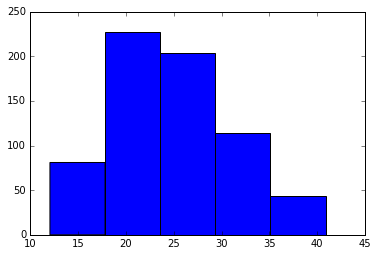

In [12]:
plt.hist(sortedScores["happier_mu"], bins=5)
plt.show()

In [13]:
df_tsne['happy_label'] = np.where(sortedScores["happier_mu"]<=20, -1, np.where(sortedScores["happier_mu"]>=30,1,0))
#df_tsne['happy_label'] = sortedScores["happier_mu"]

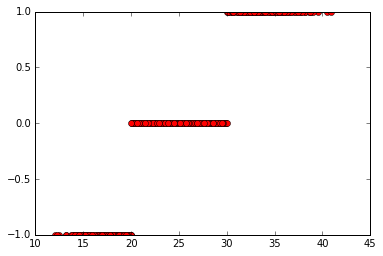

In [14]:
plt.plot(sortedScores["happier_mu"], df_tsne['happy_label'],'ro')
plt.show()

In [15]:
# df_tsne.shape

# len(FEATURESALL)

In [16]:
from ggplot import *

C:\Users\rutad\Anaconda3\envs\tensorflow\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\Users\rutad\Anaconda3\envs\tensorflow\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
C:\Users\rutad\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


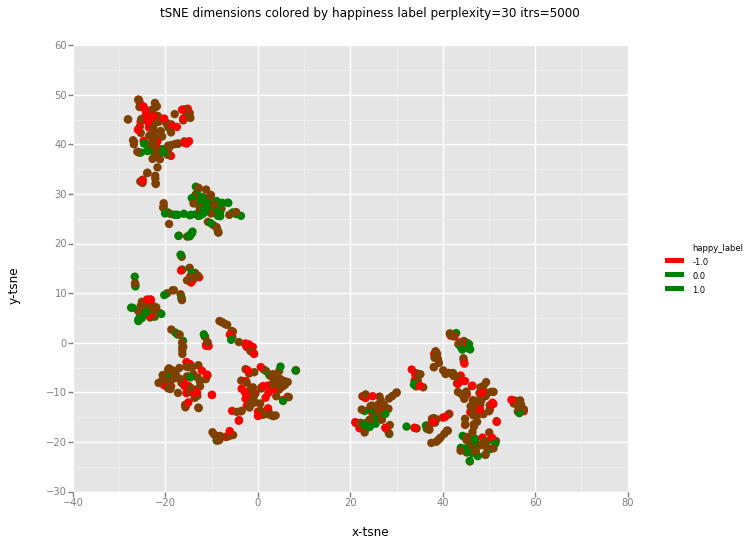

<ggplot: (10977747)>

In [21]:
chart = ggplot( df_tsne, aes(x='x-tsne', y='y-tsne', color='happy_label') ) \
        + geom_point(size=70,alpha=1) \
        + ggtitle("tSNE dimensions colored by happiness label "+ "perplexity=" +str(perplex)+" itrs="+str(itrs))\
        + scale_color_gradient(low="red", high="green")
        #+scale_color_manual(values=['#69A2B0', '#659157', '#A1C084'])
        #+scale_color_gradient(low="red", high="green")
        #+scale_color_brewer(type='qual', palette=1)
chart